In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as skl
import seaborn as sns # библиотека для построения граффиков, более упрщенный подход к визуализации, система цветов и палитра
from scipy import stats
import scipy.stats as stat

%matplotlib inline

In [195]:
df_original= pd.read_excel('Variant5.xlsx')
df = df_original.copy()

df.head()

,Пол ребенка,"Вес при рождении, г",АпГар-1,ЧСС,Гемоглобин,Тромбоциты,K,Na,Основной диагноз,Состояние при рождении
0,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое
1,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое
2,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое
3,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое
4,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое


In [168]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Пол ребенка             426 non-null    object 
 1   Вес при рождении, г     426 non-null    int64  
 2   АпГар-1                 411 non-null    float64
 3   ЧСС                     416 non-null    float64
 4   Гемоглобин              424 non-null    float64
 5   Тромбоциты              419 non-null    float64
 6   K                       371 non-null    float64
 7   Na                      361 non-null    float64
 8   Основной диагноз        426 non-null    object 
 9   Состояние при рождении  426 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 33.4+ KB


In [196]:
df.info() #из таблицы видно, что не все показатели представлены в полном объеме 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Пол ребенка             426 non-null    object 
 1   Вес при рождении, г     426 non-null    int64  
 2   АпГар-1                 411 non-null    float64
 3   ЧСС                     416 non-null    float64
 4   Гемоглобин              424 non-null    float64
 5   Тромбоциты              419 non-null    float64
 6   K                       371 non-null    float64
 7   Na                      361 non-null    float64
 8   Основной диагноз        426 non-null    object 
 9   Состояние при рождении  426 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 33.4+ KB


In [199]:
#Находим среднее значение в каждом количественном столбце, а затем заменяем все пропущенные значения на среднее. Кроме столбца АпГар-1, 
# так это числовая шкала и в ней должны присутвовать только целые числа
cols_to_impute = ['Вес при рождении, г', 'ЧСС', 'Гемоглобин', 'Тромбоциты', 'K', 'Na', ]  
for col in cols_to_impute:
    mean = np.mean(df[col])
    df[col] = df[col].fillna(mean)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Пол ребенка             426 non-null    object 
 1   Вес при рождении, г     426 non-null    int64  
 2   АпГар-1                 411 non-null    float64
 3   ЧСС                     426 non-null    float64
 4   Гемоглобин              426 non-null    float64
 5   Тромбоциты              426 non-null    float64
 6   K                       426 non-null    float64
 7   Na                      426 non-null    float64
 8   Основной диагноз        426 non-null    object 
 9   Состояние при рождении  426 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 33.4+ KB


In [200]:
#замена пустых значений в столбце 'АпГар-1' на моду
mode =stat.mode(df['АпГар-1'])
df['АпГар-1']=df['АпГар-1'].fillna(mode.mode)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Пол ребенка             426 non-null    object 
 1   Вес при рождении, г     426 non-null    int64  
 2   АпГар-1                 426 non-null    float64
 3   ЧСС                     426 non-null    float64
 4   Гемоглобин              426 non-null    float64
 5   Тромбоциты              426 non-null    float64
 6   K                       426 non-null    float64
 7   Na                      426 non-null    float64
 8   Основной диагноз        426 non-null    object 
 9   Состояние при рождении  426 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 33.4+ KB


In [201]:
#из таблицы видно, что некоторые значения означают одно и тоже, но записаны по разному
df['Состояние при рождении'].value_counts()

Состояние при рождении
тяжелое        234
ср.тяжести     140
удовл           29
оч.тяжелое      10
с.тяжести        6
ср. тяжести      4
оч. тяжелое      1
р.тяжести        1
ср.тяжелое       1
Name: count, dtype: int64

In [202]:
#кодирование столбца состояние здоровья, для приведения к корректным значениям
def encoder(sostoyanie_pri_rozdenii):
    if sostoyanie_pri_rozdenii == 'тяжелое':
        return  'тяжелое'
    if sostoyanie_pri_rozdenii == 'ср.тяжести':
        return  'ср.тяжести'
    if sostoyanie_pri_rozdenii == 'удовл':
        return  'удовл'
    if sostoyanie_pri_rozdenii == 'с.тяжести':
        return  'ср.тяжести'
    if sostoyanie_pri_rozdenii == 'оч.тяжелое':
        return  'оч.тяжелое'
    if sostoyanie_pri_rozdenii == 'ср. тяжести':
        return  'ср.тяжести'
    if sostoyanie_pri_rozdenii == 'оч. тяжелое':
        return  'оч.тяжелое'
    if sostoyanie_pri_rozdenii == 'р.тяжести':
        return  'ср.тяжести'
    if sostoyanie_pri_rozdenii == 'ср.тяжелое':
        return  'ср.тяжести'
          
       
df['Состояние при рождении'] = df['Состояние при рождении'].apply(encoder)

In [203]:
df['Состояние при рождении'].value_counts()

Состояние при рождении
тяжелое       234
ср.тяжести    152
удовл          29
оч.тяжелое     11
Name: count, dtype: int64

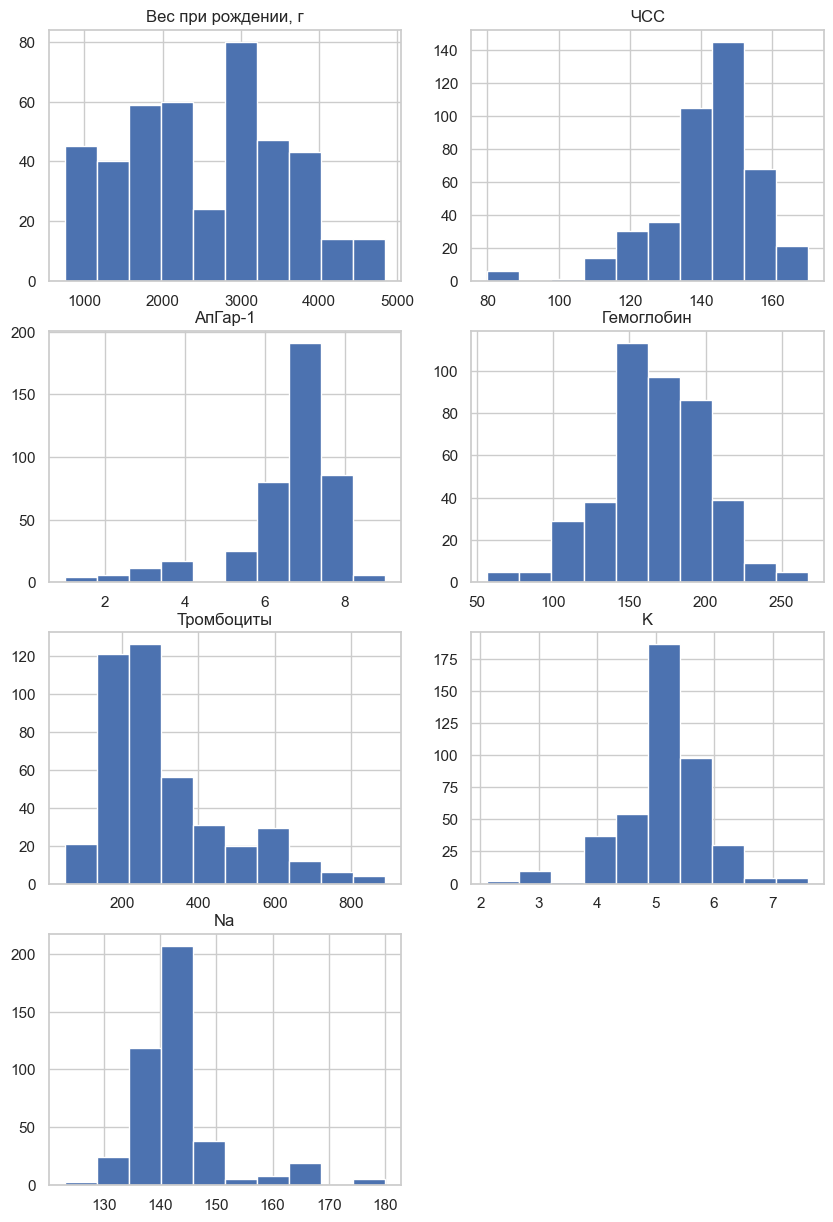

In [204]:
#построениие гистограмм до удаления выбросов
fig, ax = plt.subplots(4,2, figsize=(10,15)) 

ax[0, 0].hist(df['Вес при рождении, г'])
ax[0, 0].set_title('Вес при рождении, г')

ax[0, 1].hist(df['ЧСС'])
ax[0, 1].set_title('ЧСС')

ax[1, 0].hist(df['АпГар-1'])
ax[1, 0].set_title('АпГар-1')

ax[1, 1].hist(df['Гемоглобин'])
ax[1, 1].set_title('Гемоглобин')

ax[2, 0].hist(df['Тромбоциты'])
ax[2, 0].set_title('Тромбоциты')

ax[2, 1].hist(df['K'])
ax[2, 1].set_title('K')

ax[3, 0].hist(df['Na'])
ax[3, 0].set_title('Na')

ax[3,1].axis('off')


plt.show()

In [205]:
df_outlier_less = df

In [206]:
#функция для обработки выбросов
def outlier_less(df,col):
    Q1 = np.quantile(df[[col]], 0.25)
    Q3 = np.quantile(df[[col]], 0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    higher = Q3 + 1.5*IQR
    
    df_outlier_less = df[df[col] >= lower]
    #проверка на наличие вхних выбросов
    df_outlier_less = df_outlier_less[df_outlier_less[col] <= higher]
    return (df_outlier_less)

АпГар-1
7.0    191
8.0     86
6.0     80
5.0     25
4.0     17
3.0     11
2.0      6
9.0      6
1.0      4
Name: count, dtype: int64

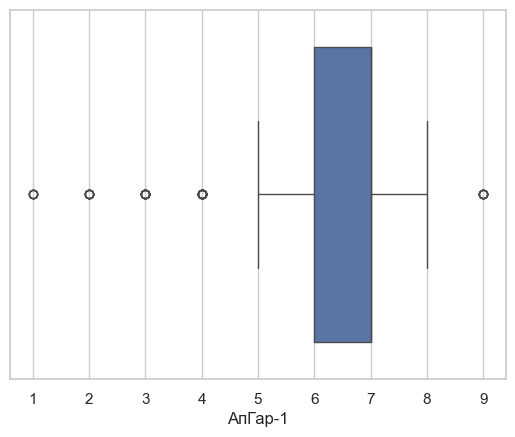

In [207]:
#диаграмма размаха для столбца АпГар-1 показывает большое окличество выбросов
# из таблицы видно, что выбросы показанные на диаграмме занимают 10% данных
sns.set(style='whitegrid')
sns.boxplot(df, x='АпГар-1')
df['АпГар-1'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 0 to 425
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Пол ребенка             382 non-null    object 
 1   Вес при рождении, г     382 non-null    int64  
 2   АпГар-1                 382 non-null    float64
 3   ЧСС                     382 non-null    float64
 4   Гемоглобин              382 non-null    float64
 5   Тромбоциты              382 non-null    float64
 6   K                       382 non-null    float64
 7   Na                      382 non-null    float64
 8   Основной диагноз        382 non-null    object 
 9   Состояние при рождении  382 non-null    object 
 10  апгар код               382 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 35.8+ KB


АпГар-1
7.0    191
8.0     86
6.0     80
5.0     25
Name: count, dtype: int64

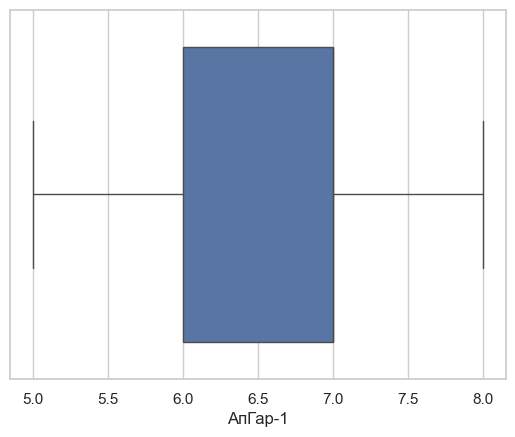

In [166]:
#диаграмма размаха после удаления выбросов в столбце АпГар-1
df_outlier_less = outlier_less(df_outlier_less,'АпГар-1')
df_outlier_less.info()
sns.set(style='whitegrid')
sns.boxplot(df_outlier_less, x='АпГар-1')
df_outlier_less['АпГар-1'].value_counts()

In [136]:
df_outlier_less.head()

,Пол ребенка,"Вес при рождении, г",АпГар-1,ЧСС,Гемоглобин,Тромбоциты,K,Na,Основной диагноз,Состояние при рождении,апгар код
0,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое,Норма
1,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое,Норма
2,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое,Норма
3,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое,Норма
4,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое,Норма


<Axes: xlabel='АпГар-1', ylabel='Count'>

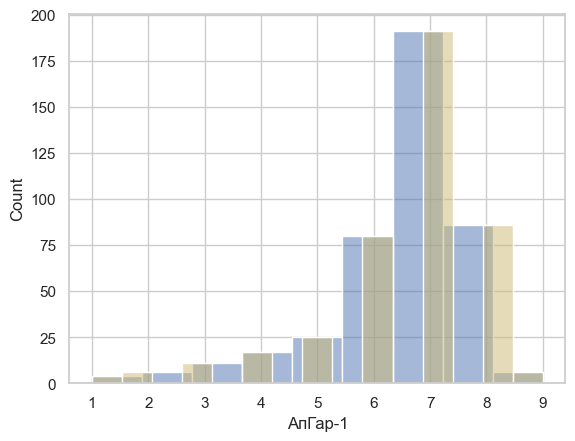

In [208]:
#для очищенных и неочищенных значений построим гистограмму
#bins - необязат.параметр для обозначения количества столбцов. Минимум 5. Рекомендация в пределах 15. 
#color - необязат.параметр для задания цвета
#alpha - необяз.параметр задания прозрачности гистограммы (помогает если две гистограммы вместе)
#nor

#формула для определения числа столбцоv
N= int(1+3.32*np.log10(len(df_outlier_less['АпГар-1'])))

sns.histplot(df, x='АпГар-1', bins=N, color='b', alpha=0.5)#с выбросами
sns.histplot(df_outlier_less, x='АпГар-1', bins=15, color='y', alpha=0.5)#без выбросов

In [209]:
#произведем кодирование Шкалы апгар в качественную шкалу, для удобства дальнейшей работы
def apgar_encoder(apgar):
    if apgar >= 7:
        return 'Норма'
    if apgar < 7 and apgar >= 5:
        return 'умеренная асфиксия'
    if apgar < 5 and apgar >= 3:
        return 'средняя асфиксия'
    if apgar < 3 :
        return 'тяжелая асфиксия'
       
       
df['апгар код'] = df['АпГар-1'].apply(apgar_encoder)


In [210]:
df.head()

,Пол ребенка,"Вес при рождении, г",АпГар-1,ЧСС,Гемоглобин,Тромбоциты,K,Na,Основной диагноз,Состояние при рождении,апгар код
0,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое,Норма
1,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое,Норма
2,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое,Норма
3,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое,Норма
4,м,885,7.0,160.0,137.0,303.0,5.1,130.0,Другое,тяжелое,Норма


In [211]:
#Построим аналогичные гистограммы для остальных количественных столбцов
df_outlier_less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Пол ребенка             426 non-null    object 
 1   Вес при рождении, г     426 non-null    int64  
 2   АпГар-1                 426 non-null    float64
 3   ЧСС                     426 non-null    float64
 4   Гемоглобин              426 non-null    float64
 5   Тромбоциты              426 non-null    float64
 6   K                       426 non-null    float64
 7   Na                      426 non-null    float64
 8   Основной диагноз        426 non-null    object 
 9   Состояние при рождении  426 non-null    object 
 10  апгар код               426 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 36.7+ KB


In [212]:

df_outlier_less = outlier_less(df_outlier_less,'Вес при рождении, г')
df_outlier_less = outlier_less(df_outlier_less,'ЧСС')
df_outlier_less = outlier_less(df_outlier_less,'Гемоглобин')
df_outlier_less = outlier_less(df_outlier_less,'Тромбоциты')
df_outlier_less = outlier_less(df_outlier_less,'K')
df_outlier_less = outlier_less(df_outlier_less,'Na')
print(df_outlier_less)

    Пол ребенка  Вес при рождении, г  АпГар-1    ЧСС  Гемоглобин  Тромбоциты  \
6             м                  800      6.0  164.0       154.0       185.0   
8             м                  800      6.0  164.0       154.0       185.0   
11            м                  800      6.0  164.0       154.0       185.0   
12            м                  800      6.0  164.0       154.0       185.0   
14            м                  800      6.0  164.0       154.0       185.0   
..          ...                  ...      ...    ...         ...         ...   
409           м                 3588      7.0  130.0       154.0       160.0   
410           м                 3740      8.0  144.0       157.0       378.0   
423           м                 4650      7.0  140.0       175.0       331.0   
424           м                 3140      3.0  125.0       156.0       312.0   
425           ж                 3200      7.0  140.0       155.0       407.0   

            K         Na Основной диагн

In [213]:
df_outlier_less.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 6 to 425
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Пол ребенка             273 non-null    object 
 1   Вес при рождении, г     273 non-null    int64  
 2   АпГар-1                 273 non-null    float64
 3   ЧСС                     273 non-null    float64
 4   Гемоглобин              273 non-null    float64
 5   Тромбоциты              273 non-null    float64
 6   K                       273 non-null    float64
 7   Na                      273 non-null    float64
 8   Основной диагноз        273 non-null    object 
 9   Состояние при рождении  273 non-null    object 
 10  апгар код               273 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 25.6+ KB


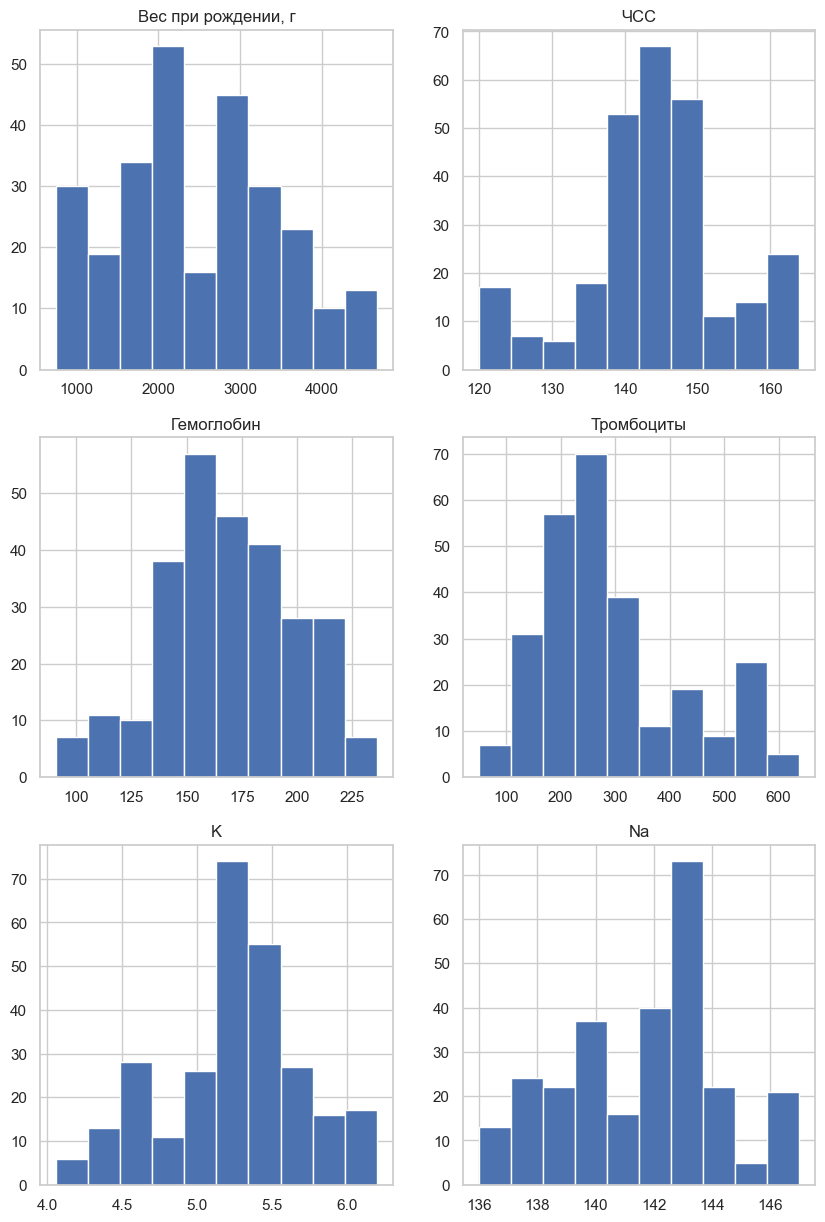

In [216]:
#построениие гистограмм после удаления выбросов
fig, ax = plt.subplots(3,2, figsize=(10,15)) 

ax[0, 0].hist(df_outlier_less['Вес при рождении, г'])
ax[0, 0].set_title('Вес при рождении, г')

ax[0, 1].hist(df_outlier_less['ЧСС'])
ax[0, 1].set_title('ЧСС')

ax[1, 0].hist(df_outlier_less['Гемоглобин'])
ax[1, 0].set_title('Гемоглобин')

ax[1, 1].hist(df_outlier_less['Тромбоциты'])
ax[1, 1].set_title('Тромбоциты')

ax[2, 0].hist(df_outlier_less['K'])
ax[2, 0].set_title('K')

ax[2, 1].hist(df_outlier_less['Na'])
ax[2, 1].set_title('Na')

plt.show()

Проверка данных на нормальность:

In [248]:
#для дальнейшей обработки разделеним данные по типу на категориальные и количественные
df_categorical = df_outlier_less.select_dtypes(include=[object]) #Это метод pandas, который выбирает столбцы DataFrame на основе их типа данных.
#Здесь указывается, что нужно выбрать только столбцы типа object. 
# В pandas тип object обычно используется для хранения строковых данных и категориальных переменных. 
# Таким образом, эта строка создает новый DataFrame df_categorical, содержащий только категориальные столбцы из исходного DataFrame df.
df_numerical = df_outlier_less.drop(df_categorical.columns, axis=1)
# df.drop(...): Это метод pandas, который удаляет строки или столбцы из DataFrame.
#  df_categorical.columns: Это атрибут DataFrame df_categorical, который возвращает список названий его столбцов (т.е. названий категориальных столбцов исходного DataFrame).
# axis=1: Указывает, что нужно удалить столбцы (axis=0 удаляет строки).
# В итоге, эта строка создает новый DataFrame df_numerical, удаляя из исходного DataFrame df все столбцы, которые присутствуют в df_categorical (т.е. все категориальные столбцы).

df_numerical

,"Вес при рождении, г",АпГар-1,ЧСС,Гемоглобин,Тромбоциты,K,Na
6,800,6.0,164.0,154.0,185.0,4.700000,142.00000
8,800,6.0,164.0,154.0,185.0,4.700000,142.00000
11,800,6.0,164.0,154.0,185.0,4.700000,142.00000
12,800,6.0,164.0,154.0,185.0,4.700000,142.00000
14,800,6.0,164.0,154.0,185.0,4.700000,142.00000
...,...,...,...,...,...,...,...
409,3588,7.0,130.0,154.0,160.0,5.178544,143.02856
410,3740,8.0,144.0,157.0,378.0,5.300000,140.00000
423,4650,7.0,140.0,175.0,331.0,5.178544,143.02856
424,3140,3.0,125.0,156.0,312.0,5.100000,142.00000


In [249]:
df_categorical

,Пол ребенка,Основной диагноз,Состояние при рождении,апгар код
6,м,Пневмония,тяжелое,умеренная асфиксия
8,м,Пневмония,тяжелое,умеренная асфиксия
11,м,Пневмония,тяжелое,умеренная асфиксия
12,м,Пневмония,тяжелое,умеренная асфиксия
14,м,Пневмония,тяжелое,умеренная асфиксия
...,...,...,...,...
409,м,Пневмония,тяжелое,Норма
410,м,ВУИ,удовл,Норма
423,м,Другое,тяжелое,Норма
424,м,Пневмония,тяжелое,средняя асфиксия


In [251]:
#тест хи-квадрат
for col in df_numerical.columns:
    res = stats.chisquare(df_numerical[col])
    if res.pvalue < 0.05:
        print(f'{col} - Нет достаточных оснований отвергнуть нулевую гипотезу')
    else: 
        print(f'{col} - Нет достаточных оснований принять нулевую гипотезу')

Вес при рождении, г - Нет достаточных оснований отвергнуть нулевую гипотезу
АпГар-1 - Нет достаточных оснований принять нулевую гипотезу
ЧСС - Нет достаточных оснований принять нулевую гипотезу
Гемоглобин - Нет достаточных оснований отвергнуть нулевую гипотезу
Тромбоциты - Нет достаточных оснований отвергнуть нулевую гипотезу
K - Нет достаточных оснований принять нулевую гипотезу
Na - Нет достаточных оснований принять нулевую гипотезу


In [252]:
#Критерий Колмогорова-Смирнова
for col in df_numerical.columns:
    res = stats.kstest(df_numerical[col], cdf=stats.norm.cdf)
    if res.pvalue < 0.05:
        print(f'{col} - Нет достаточных оснований отвергнуть нулевую гипотезу')
    else: 
        print(f'{col} - Нет достаточных оснований принять нулевую гипотезу')

Вес при рождении, г - Нет достаточных оснований отвергнуть нулевую гипотезу
АпГар-1 - Нет достаточных оснований отвергнуть нулевую гипотезу
ЧСС - Нет достаточных оснований отвергнуть нулевую гипотезу
Гемоглобин - Нет достаточных оснований отвергнуть нулевую гипотезу
Тромбоциты - Нет достаточных оснований отвергнуть нулевую гипотезу
K - Нет достаточных оснований отвергнуть нулевую гипотезу
Na - Нет достаточных оснований отвергнуть нулевую гипотезу


In [253]:
#Критерий Шапиро-Уилки, p>0.05, в этом случае принимается нулевая гипотеза
for col in df_numerical.columns:
    res = stats.shapiro(df_numerical[col])
    if res.pvalue > 0.05:
        print(f'{col} - Нет достаточных оснований отвергнуть нулевую гипотезу')
    else: 
        print(f'{col} - Нет достаточных оснований принять нулевую гипотезу')

Вес при рождении, г - Нет достаточных оснований принять нулевую гипотезу
АпГар-1 - Нет достаточных оснований принять нулевую гипотезу
ЧСС - Нет достаточных оснований принять нулевую гипотезу
Гемоглобин - Нет достаточных оснований принять нулевую гипотезу
Тромбоциты - Нет достаточных оснований принять нулевую гипотезу
K - Нет достаточных оснований принять нулевую гипотезу
Na - Нет достаточных оснований принять нулевую гипотезу


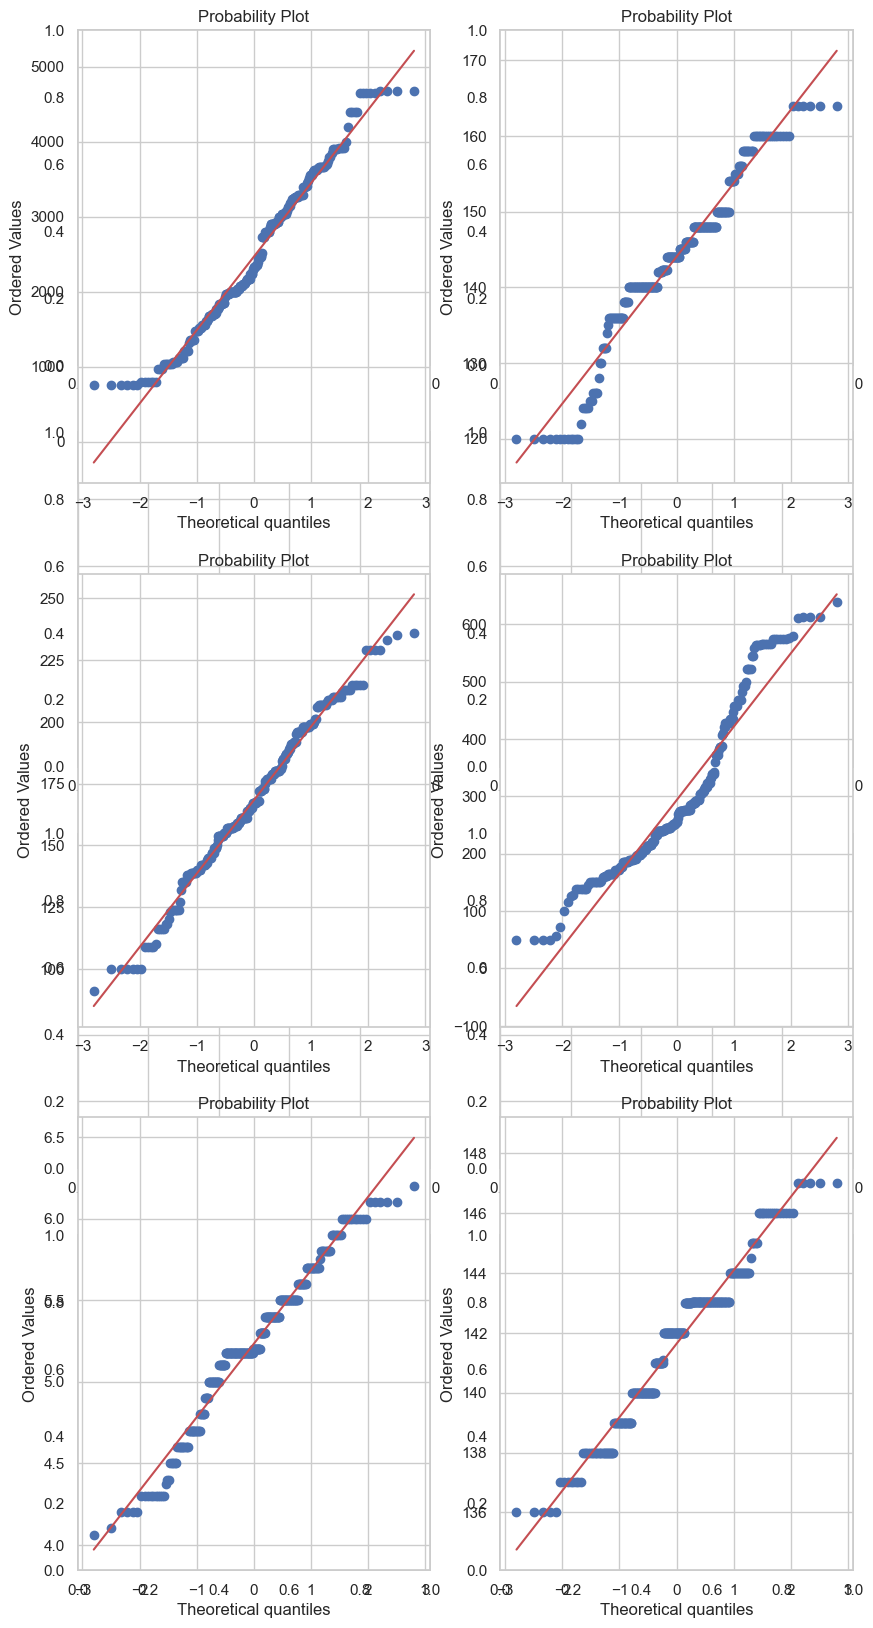

In [254]:
#вероятностный графический метод
plt.subplots(4,2,figsize=(10,20),)

ax1 = plt.subplot(321)
ax1 = stats.probplot(df_numerical['Вес при рождении, г'], plot=plt)

ax2 = plt.subplot(322)
ax2 = stats.probplot(df_numerical['ЧСС'], plot=plt)

ax3 = plt.subplot(323)
ax3 = stats.probplot(df_numerical['Гемоглобин'], plot=plt)

ax4 = plt.subplot(324)
ax4 = stats.probplot(df_numerical['Тромбоциты'], plot=plt)

ax5 = plt.subplot(325)
ax5 = stats.probplot(df_numerical['K'], plot=plt)

ax6 = plt.subplot(326)
ax6 = stats.probplot(df_numerical['Na'], plot=plt)



Задание №2 Корреляционный анализ между количественными показателями

In [255]:
data = df_numerical.loc[:,['Вес при рождении, г',	"ЧСС", 'Тромбоциты', "Гемоглобин",	"K",	"Na"]]
data.head()

,"Вес при рождении, г",ЧСС,Тромбоциты,Гемоглобин,K,Na
6,800,164.0,185.0,154.0,4.7,142.0
8,800,164.0,185.0,154.0,4.7,142.0
11,800,164.0,185.0,154.0,4.7,142.0
12,800,164.0,185.0,154.0,4.7,142.0
14,800,164.0,185.0,154.0,4.7,142.0


In [257]:
corr = data.corr()

<Axes: >

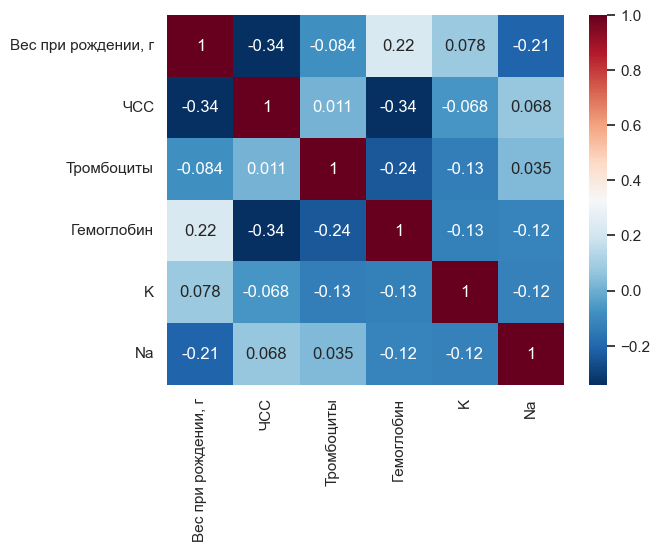

In [258]:
sns.heatmap(corr, annot=True, cmap='RdBu_r')

In [259]:
print(corr)

                     Вес при рождении, г       ЧСС  Тромбоциты  Гемоглобин  \
Вес при рождении, г             1.000000 -0.341573   -0.083589    0.220416   
ЧСС                            -0.341573  1.000000    0.011164   -0.340587   
Тромбоциты                     -0.083589  0.011164    1.000000   -0.240168   
Гемоглобин                      0.220416 -0.340587   -0.240168    1.000000   
K                               0.078272 -0.068076   -0.132440   -0.131640   
Na                             -0.210304  0.068228    0.034605   -0.121296   

                            K        Na  
Вес при рождении, г  0.078272 -0.210304  
ЧСС                 -0.068076  0.068228  
Тромбоциты          -0.132440  0.034605  
Гемоглобин          -0.131640 -0.121296  
K                    1.000000 -0.121596  
Na                  -0.121596  1.000000  


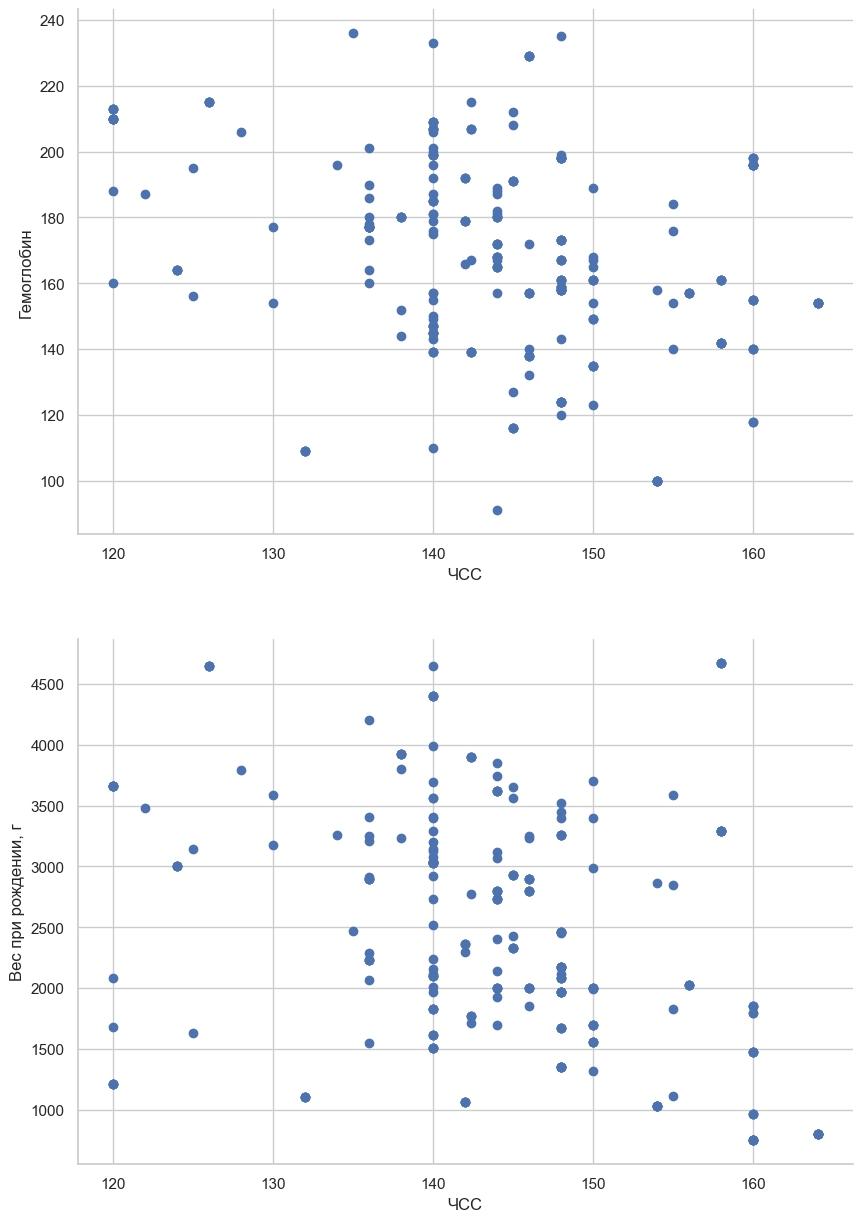

In [260]:
#строим диаграммы рассеяния
fig, ax = plt.subplots(2,1, figsize=(10,15)) #первый и второй параметры, задают количество столбцов и строк на рисунке, третий параметр размер самого рисунка, результатом являются два параметра фигура  и axes та часть которая испоьзуется для вывода значений, нумерация элементов слева направо сверху вниз.
sns.despine()

ax[0].scatter(df_numerical['ЧСС'], df_numerical['Гемоглобин'])
ax[0].set_xlabel('ЧСС')  # Подпись оси x для первого subplot'а
ax[0].set_ylabel('Гемоглобин')  # Подпись оси y для первого subplot'а

ax[1].scatter(df_numerical['ЧСС'], df_numerical['Вес при рождении, г'])
ax[1].set_xlabel('ЧСС')  # Подпись оси x для второго subplot'а
ax[1].set_ylabel('Вес при рождении, г')  # Подпись оси y для второго subplot'а

plt.show()

Задание№3 Кодирование количественных переменных

In [261]:
df_numerical

,"Вес при рождении, г",АпГар-1,ЧСС,Гемоглобин,Тромбоциты,K,Na
6,800,6.0,164.0,154.0,185.0,4.700000,142.00000
8,800,6.0,164.0,154.0,185.0,4.700000,142.00000
11,800,6.0,164.0,154.0,185.0,4.700000,142.00000
12,800,6.0,164.0,154.0,185.0,4.700000,142.00000
14,800,6.0,164.0,154.0,185.0,4.700000,142.00000
...,...,...,...,...,...,...,...
409,3588,7.0,130.0,154.0,160.0,5.178544,143.02856
410,3740,8.0,144.0,157.0,378.0,5.300000,140.00000
423,4650,7.0,140.0,175.0,331.0,5.178544,143.02856
424,3140,3.0,125.0,156.0,312.0,5.100000,142.00000


In [262]:
# Кодирование столбца Вес при рождении, г, для кодирования взята норма веса при рождении от 2600 до 4000 г
def weight_encoder(weight):
    if weight <= 2600:
        return 'Ниже нормы'
    if weight <= 4000 and weight > 2600:
        return 'Норма'
    if weight > 4000 :
        return 'Выше нормы'
       
       
df_outlier_less['Вес при рождении код'] = df_outlier_less['Вес при рождении, г'].apply(weight_encoder)



In [264]:
# кодирование столбца Гемоглобин, для кодирования взята норма гемоглобина у новорожденных 180-260
def gemo_encoder(gemo):
    if gemo <= 180:
        return 'Ниже нормы'
    if gemo <= 260 and gemo > 180:
        return 'Норма'
    if gemo > 260 :
        return 'Выше нормы'
       
       
df_outlier_less['Гемоглобин код'] = df_outlier_less['Гемоглобин'].apply(gemo_encoder)

In [265]:
df_outlier_less

,Пол ребенка,"Вес при рождении, г",АпГар-1,ЧСС,Гемоглобин,Тромбоциты,K,Na,Основной диагноз,Состояние при рождении,апгар код,Вес при рождении код,Гемоглобин код
6,м,800,6.0,164.0,154.0,185.0,4.700000,142.00000,Пневмония,тяжелое,умеренная асфиксия,Ниже нормы,Ниже нормы
8,м,800,6.0,164.0,154.0,185.0,4.700000,142.00000,Пневмония,тяжелое,умеренная асфиксия,Ниже нормы,Ниже нормы
11,м,800,6.0,164.0,154.0,185.0,4.700000,142.00000,Пневмония,тяжелое,умеренная асфиксия,Ниже нормы,Ниже нормы
12,м,800,6.0,164.0,154.0,185.0,4.700000,142.00000,Пневмония,тяжелое,умеренная асфиксия,Ниже нормы,Ниже нормы
14,м,800,6.0,164.0,154.0,185.0,4.700000,142.00000,Пневмония,тяжелое,умеренная асфиксия,Ниже нормы,Ниже нормы
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,м,3588,7.0,130.0,154.0,160.0,5.178544,143.02856,Пневмония,тяжелое,Норма,Норма,Ниже нормы
410,м,3740,8.0,144.0,157.0,378.0,5.300000,140.00000,ВУИ,удовл,Норма,Норма,Ниже нормы
423,м,4650,7.0,140.0,175.0,331.0,5.178544,143.02856,Другое,тяжелое,Норма,Выше нормы,Ниже нормы
424,м,3140,3.0,125.0,156.0,312.0,5.100000,142.00000,Пневмония,тяжелое,средняя асфиксия,Норма,Ниже нормы


Задание №5 Частотный анализ номинальных переменных

In [267]:
df_categorical = df_outlier_less.select_dtypes(include=[object])

In [268]:
df_categorical

,Пол ребенка,Основной диагноз,Состояние при рождении,апгар код,Вес при рождении код,Гемоглобин код
6,м,Пневмония,тяжелое,умеренная асфиксия,Ниже нормы,Ниже нормы
8,м,Пневмония,тяжелое,умеренная асфиксия,Ниже нормы,Ниже нормы
11,м,Пневмония,тяжелое,умеренная асфиксия,Ниже нормы,Ниже нормы
12,м,Пневмония,тяжелое,умеренная асфиксия,Ниже нормы,Ниже нормы
14,м,Пневмония,тяжелое,умеренная асфиксия,Ниже нормы,Ниже нормы
...,...,...,...,...,...,...
409,м,Пневмония,тяжелое,Норма,Норма,Ниже нормы
410,м,ВУИ,удовл,Норма,Норма,Ниже нормы
423,м,Другое,тяжелое,Норма,Выше нормы,Ниже нормы
424,м,Пневмония,тяжелое,средняя асфиксия,Норма,Ниже нормы


In [286]:
crosstab = pd.crosstab([df_categorical['апгар код']],
            [df_categorical['Вес при рождении код']],
            #rownames = [''],
            #colnames = [''],
            margins=True,)

crosstab

Вес при рождении код,Выше нормы,Ниже нормы,Норма,All
апгар код,,,,
Норма,10,96,77,183
средняя асфиксия,0,19,3,22
тяжелая асфиксия,0,4,6,10
умеренная асфиксия,4,33,21,58
All,14,152,107,273


In [283]:
grouped = df_categorical.groupby(['Пол ребенка'])['Вес при рождении код'].value_counts(normalize=True) * 100
print("\nГруппированный частотный анализ:")
print(grouped)


Группированный частотный анализ:
Пол ребенка  Вес при рождении код
ж            Ниже нормы              55.555556
             Норма                   41.666667
             Выше нормы               2.777778
м            Ниже нормы              55.813953
             Норма                   36.434109
             Выше нормы               7.751938
Name: proportion, dtype: float64


In [289]:
crosstab = pd.crosstab([df_categorical['Пол ребенка']],
            [df_categorical['Основной диагноз']],
            rownames = [''],
            colnames = [''],
            margins=True,)

crosstab

,Болезни ССС,ВУИ,Врожденные патологии,Другое,Желтуха,Новообразования,Пневмония,Расстройства ЦНС,All
,,,,,,,,,
ж,25,11,24,27,27,2,28,0,144
м,40,20,12,22,4,5,25,1,129
All,65,31,36,49,31,7,53,1,273


In [290]:
grouped = df.groupby(['Пол ребенка'])['Основной диагноз'].value_counts(normalize=True) * 100
print("\nГруппированный частотный анализ:")
print(grouped)


Группированный частотный анализ:
Пол ребенка  Основной диагноз    
ж            Пневмония               20.476190
             Болезни ССС             19.047619
             Другое                  19.047619
             Врожденные патологии    13.333333
             Желтуха                 13.333333
             ВУИ                     12.857143
             Новообразования          1.428571
             Расстройства ЦНС         0.476190
м            Пневмония               27.777778
             Болезни ССС             23.611111
             Другое                  17.129630
             ВУИ                     13.888889
             Врожденные патологии    10.185185
             Расстройства ЦНС         3.240741
             Новообразования          2.314815
             Желтуха                  1.851852
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Зависимость E от 1/r^2')

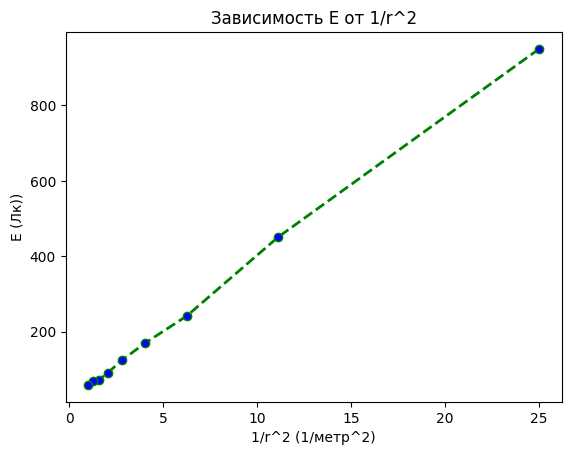

In [6]:
import matplotlib.pyplot as plt

y = [950, 451, 242, 169, 124, 91, 72, 70, 59]
x = [25, 11.11, 6.25, 4, 2.78, 2.04, 1.56, 1.23, 1]

plt.plot(x, y, color='green', linestyle='dashed', linewidth=2,
         marker='o', markerfacecolor='blue', markersize=6)

plt.xlabel("1/r^2 (1/метр^2)")
plt.ylabel("E (Лк))")
plt.title("Зависимость E от 1/r^2")

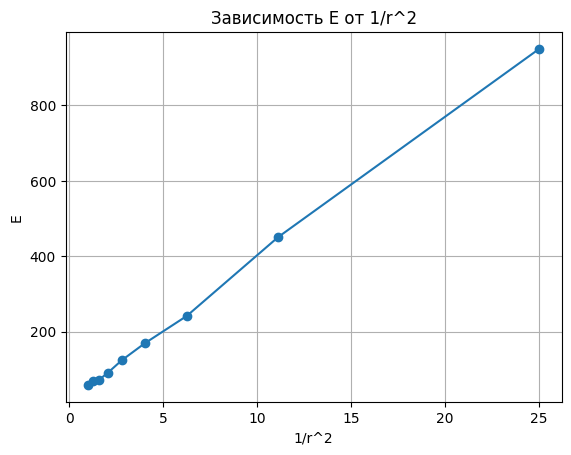

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Данные из изображения
E = [950, 451, 242, 169, 124, 91, 72, 70, 59]
one_over_r_squared = [25, 11.11111, 6.25, 4, 2.777778, 2.040816, 1.5625, 1.234568, 1]

# Преобразуем данные в массивы NumPy для удобства (опционально, но полезно)
E = np.array(E)
one_over_r_squared = np.array(one_over_r_squared)

# Строим график
plt.plot(one_over_r_squared, E, marker='o')  # Строим график: 1/r^2 по оси X, E по оси Y

# Добавляем метки и заголовок
plt.xlabel("1/r^2")
plt.ylabel("E")
plt.title("Зависимость E от 1/r^2")

# Добавляем сетку (опционально)
plt.grid(True)

# Отображаем график
plt.show()


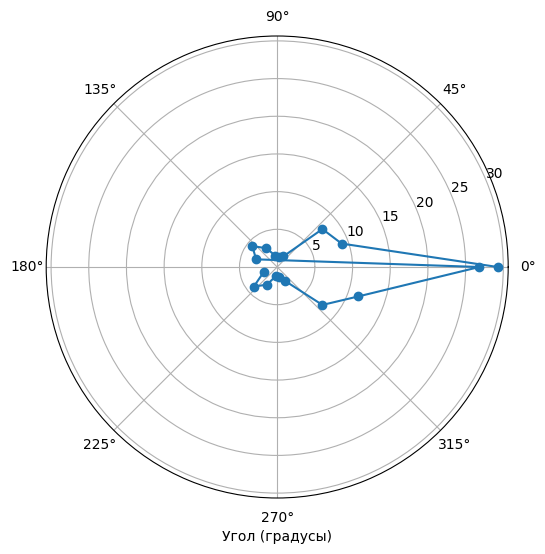

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
angles = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 0, -20, -40, -60, -80, -100, -120, -140, -160])  # Углы в градусах
intensity = np.array([29.25, 9.09, 7.83, 1.62, 1.35, 1.53, 2.88, 4.32, 2.97, 26.82, 11.43,	7.83, 2.16, 1.35, 1.26, 2.7, 4.05, 1.89])  # Интенсивность

# Преобразование углов в радианы
angles_rad = np.radians(angles)

# Построение полярного графика
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')
ax.plot(angles_rad, intensity, marker='o')

# Настройка графика

ax.set_xlabel("Угол (градусы)")


plt.show()


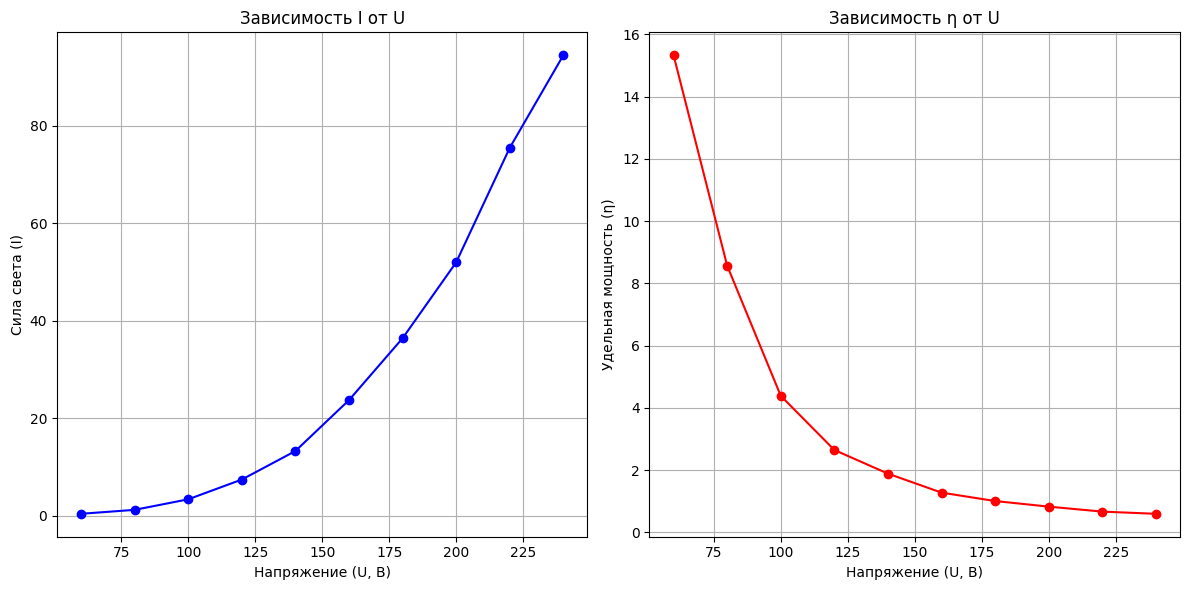

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
U = np.array([60, 80, 100, 120, 140, 160, 180, 200, 220, 240])  # Напряжение
I = np.array([0.45, 1.26, 3.42, 7.47, 13.32, 23.76, 36.45, 52.02, 75.51, 94.5])  # Интенсивность
eta = np.array([15.33, 8.57, 4.39, 2.65, 1.89, 1.28, 1.01, 0.83, 0.67, 0.60])  # Эффективность

# Построение графиков
plt.figure(figsize=(12, 6))

# График I = f(U)
plt.subplot(1, 2, 1)
plt.plot(U, I, marker='o', color='b')
plt.title("Зависимость I от U")
plt.xlabel("Напряжение (U, В)")
plt.ylabel("Сила света (I)")
plt.grid()

# График η = f(U)
plt.subplot(1, 2, 2)
plt.plot(U, eta, marker='o', color='r')
plt.title("Зависимость η от U")
plt.xlabel("Напряжение (U, В)")
plt.ylabel("Удельная мощность (η)")
plt.grid()

plt.tight_layout()
plt.show()
